In [60]:
%config Completer.use_jedi = False

In [20]:
import os
import shutil
from glob import glob
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl
import copy

In [22]:
print ('설정파일 위치: ', mpl.matplotlib_fname())
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')

설정파일 위치:  /home/godeung/anaconda3/envs/python36/lib/python3.6/site-packages/matplotlib/mpl-data/matplotlibrc


In [3]:
dirlist = ['./Boots','./Sandals','./Shoes','./Slippers']

In [4]:
# os.listdir("./Boots/Ankle/A. Testoni/") # 폴더 3개의 층 

In [5]:
# for direc1 in dirlist: # 3개의 디렉토리 
#     direc2_list=os.listdir(direc1)
#     for direc2 in direc2_list:
#         direc3=os.path.join(direc1,direc2)
#         direc3_list=os.listdir(direc3)
#         for direc_fin in direc3_list:
#             finpath=os.path.join(direc3,direc_fin)
#             print(glob(finpath+"/*.jpg"))


In [1]:
from sklearn.datasets import fetch_olivetti_faces

faces_all = fetch_olivetti_faces()


In [20]:
faces_all.images.shape

(400, 64, 64)

In [23]:
K = 20  # 20번 인물의 사진만 선택
faces = faces_all.images[faces_all.target == K]


In [35]:
faces_all.data[faces_all.target == K].shape

(10, 4096)

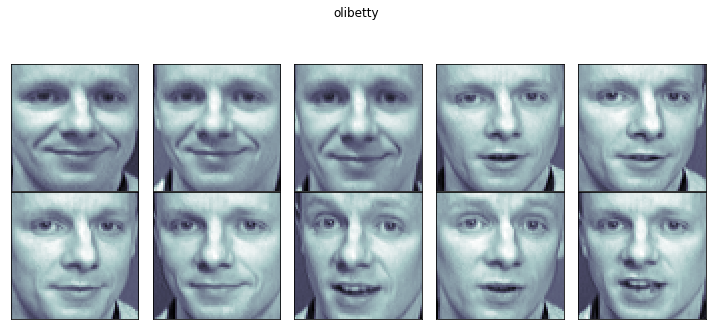

In [9]:

N = 2
M = 5
fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
for i in range(N):
    for j in range(M):
        k = i * M + j
        ax = fig.add_subplot(N, M, k+1)
        ax.imshow(faces[k], cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
plt.suptitle("olibetty")
plt.tight_layout()
plt.show()

In [33]:
from sklearn.decomposition import PCA
pca3 = PCA(n_components=2)
X3 = faces_all.data[faces_all.target == 20]
print(X3.shape)
W3 = pca3.fit_transform(X3)
X32 = pca3.inverse_transform(W3)

(10, 4096)


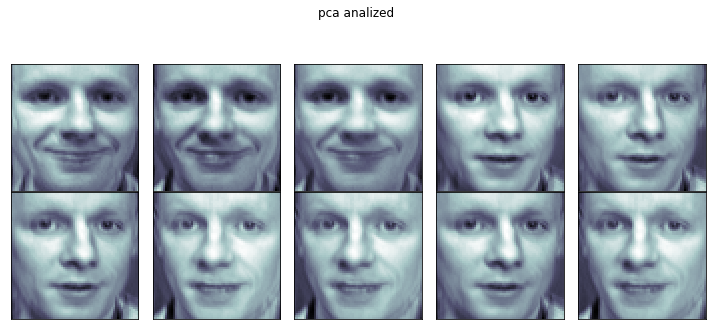

In [11]:
N = 2
M = 5
fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
for i in range(N):
    for j in range(M):
        k = i * M + j
        ax = fig.add_subplot(N, M, k+1)
        ax.imshow(X32[k].reshape(64, 64), cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
plt.suptitle("pca analized")
plt.tight_layout()
plt.show()

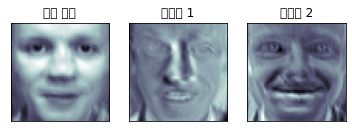

In [35]:
face_mean = pca3.mean_.reshape(64, 64)
face_p1 = pca3.components_[0].reshape(64, 64)
face_p2 = pca3.components_[1].reshape(64, 64)

plt.subplot(131)
plt.imshow(face_mean, cmap=plt.cm.bone)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.title("평균 얼굴")
plt.subplot(132)
plt.imshow(face_p1, cmap=plt.cm.bone)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.title("주성분 1")
plt.subplot(133)
plt.imshow(face_p2, cmap=plt.cm.bone)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.title("주성분 2")
plt.show()

In [30]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import copy

In [22]:
shoesimage = image.ImageDataGenerator(rescale=1/255.0)

In [23]:
imagegenerated=shoesimage.flow_from_directory(directory="./AllShoes/",target_size=(98,98),batch_size=10000)

Found 50025 images belonging to 1 classes.


In [24]:
batch_data = []
for i,image in enumerate(imagegenerated):
    if i == 1:
        break
    batch_data.append(image)

In [34]:
dt=batch_data[0][0]
import numpy as np
from numpy import 

In [37]:
dt[...,0].shape

(10000, 98, 98)

In [39]:
type(dt[...,0])

numpy.ndarray

In [48]:
flatten = []
for i in dt[...,0]:
    flatten.append(i.flatten())

In [52]:
np.array(flatten).shape

(10000, 9604)

In [53]:
from sklearn.decomposition import PCA
pca = PCA(n_components=100)
x=copy.copy(np.array(flatten))
 
w = pca.fit_transform(x)
w2 = pca.inverse_transform(w)

In [54]:
w2.shape

(10000, 9604)

```python
N = 2
M = 5
fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
for i in range(N):
    for j in range(M):
        k = i * M + j
        ax = fig.add_subplot(N, M, k+1)
        ax.imshow(X32[k].reshape(64, 64), cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
plt.suptitle("pca analized")
plt.tight_layout()
plt.show()
```

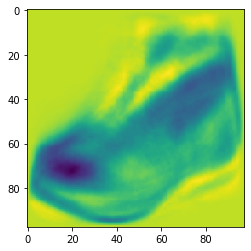

In [56]:
import matplotlib.pyplot as plt
plt.imshow(w2[0].reshape(98,98))

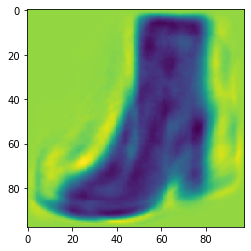

In [57]:
import matplotlib.pyplot as plt
plt.imshow(w2[1].reshape(98,98))

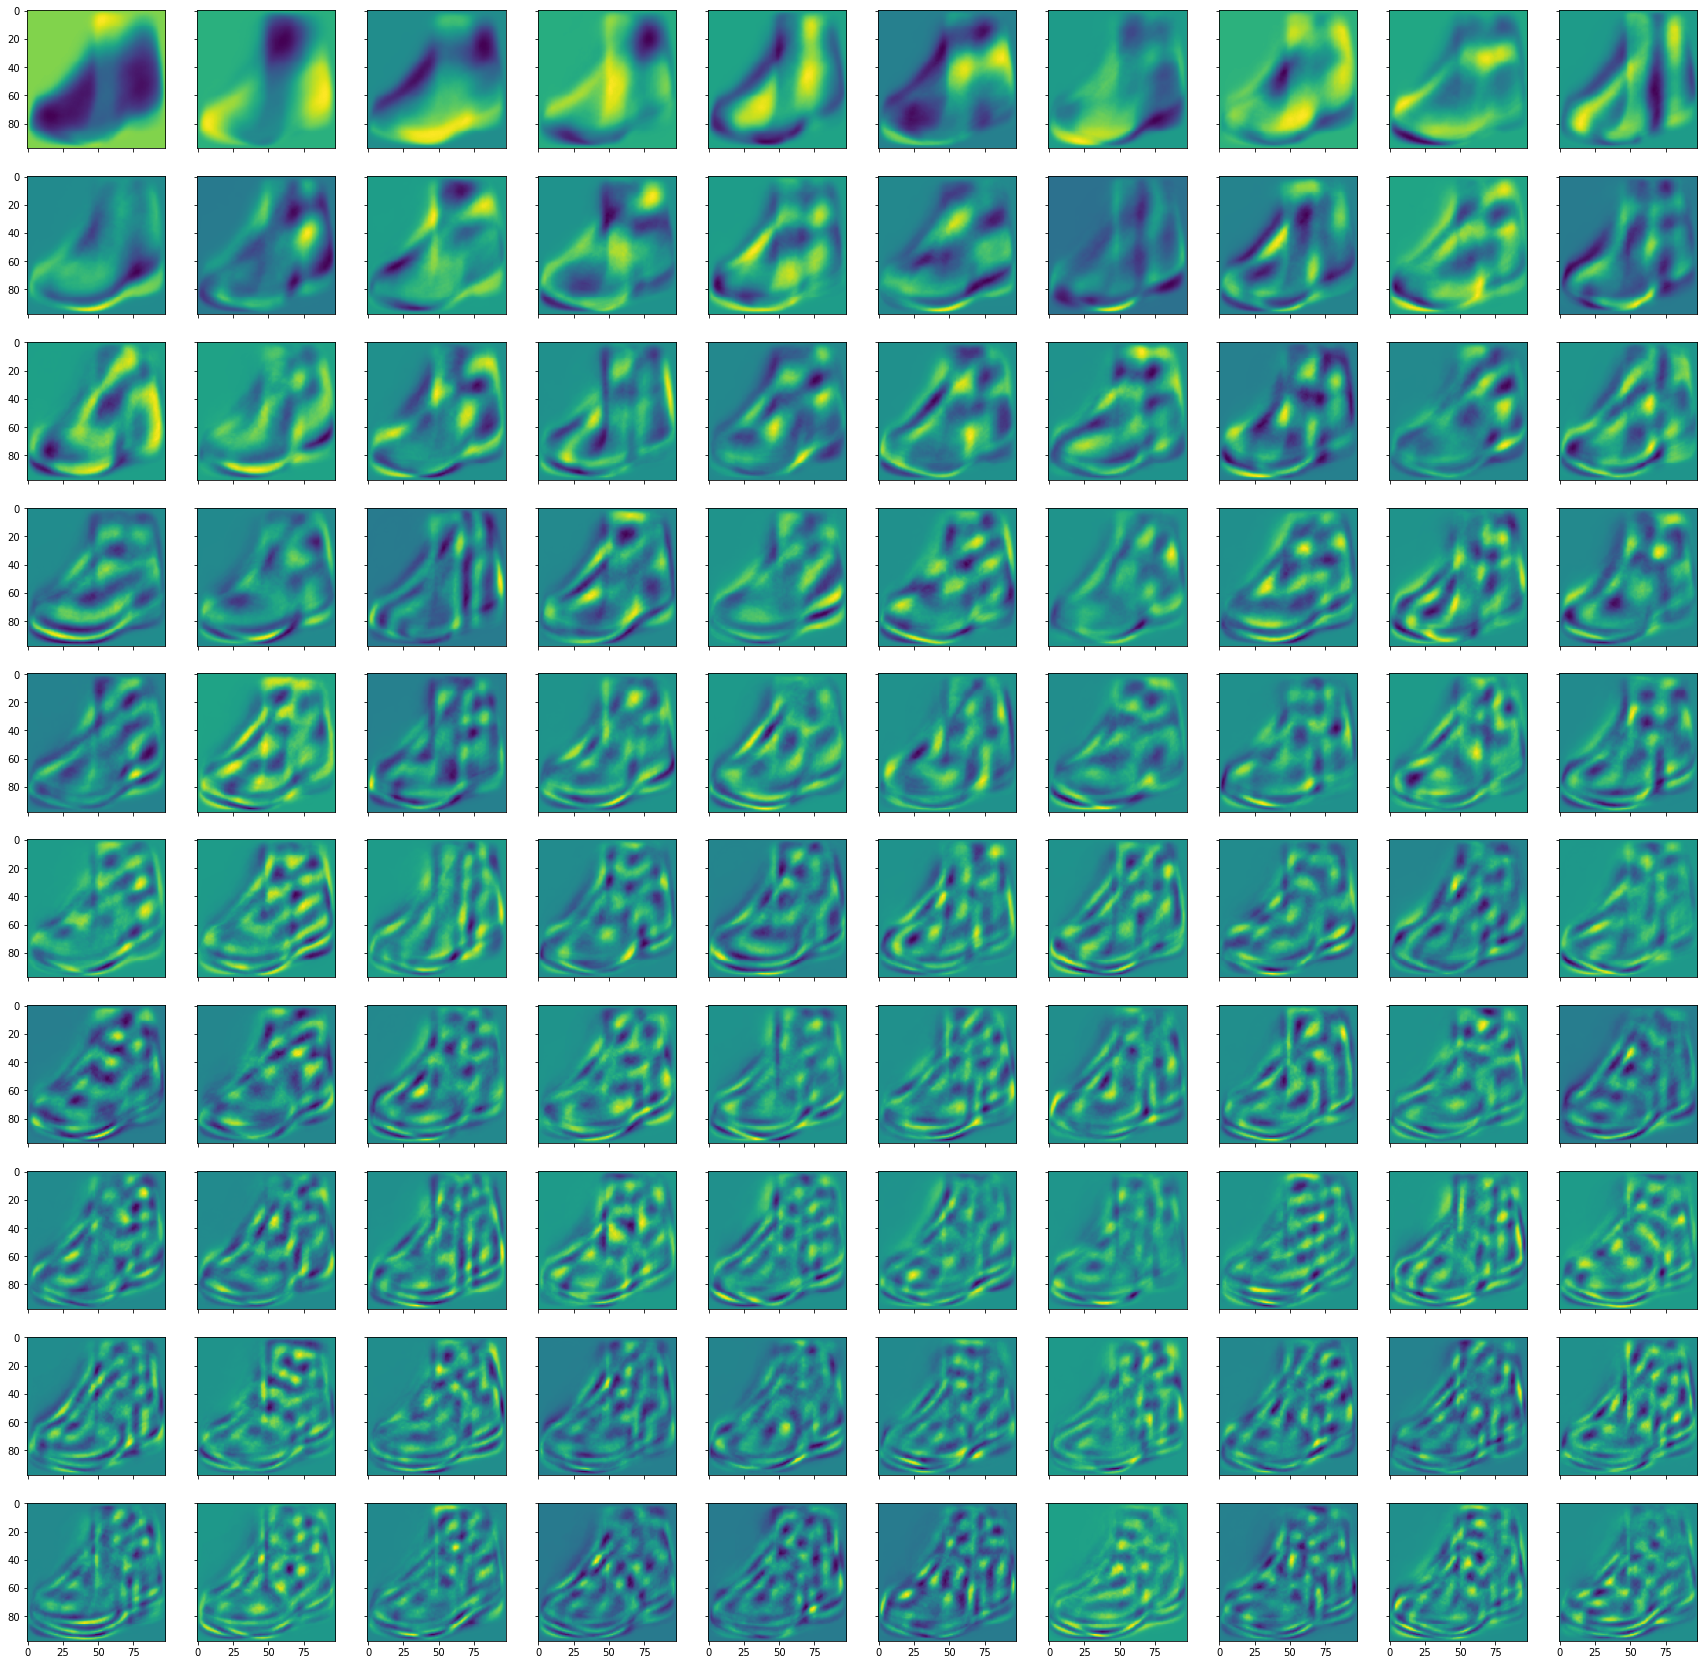

In [72]:
shoes_mean = pca.mean_.reshape(98, 98)
shoes_p1 = pca.components_[0].reshape(98, 98)
shoes_p2 = pca.components_[1].reshape(98, 98)
fig,ax=plt.subplots(nrows=10,ncols=10,sharex=True,
    sharey=True,figsize=(30,30))    



for i,image in enumerate(pca.components_):
    k=i//10
    j=i%10
    ax[k][j].imshow(image.reshape(98,98))
